In [2]:
# Importar as bibliotecas necessarias

# Bibliotecas de manipulação de dados e analise

import pandas as pd
import numpy as np

# Bibliotecas de gráfico

import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas de previsões

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Ignorar aviso de erros

import warnings
warnings.filterwarnings('ignore')


# Carregar e verificar os dados

In [3]:
# Carregar o arquivo csv

df = pd.read_csv('/workspaces/Acidente_Vascular-Cerebral/healthcare-dataset-stroke-data.csv')

In [4]:
# Visualizar as 5 primeiras linhas do arquivo

df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Informação sobre o Dataset

* id: identificador exclusivo
* gender: "Male", "Female" or "Other" ("Masculino", "Feminino" ou "Outro")
* age: idade do paciente
* hypertension: 0 e o paciente não tem hipertensão, 1 se o paciente tem hipertensão
* heart_disease: 0 se o paciente não tem nenhuma doença cardíaca, 1 se o paciente tem uma doença cardíaca
* ever_married: "No" or "Yes" ( É casado = "Sim" ou "Não"
* work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" (Tipo de Trabalho = "Criança", "Trabalho Governamental", "Nunca Trabalhou", "Particular" ou "Autônomo")
* Residence_type: "Rural" ou "Urbano
* avg_glucose_level: nível médio de glicose no sangue
* bmi: índice de massa corporal
* smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* ("fumou antigamente", "nunca fumou", "fuma" ou "desconhecido")
* stroke: 1 se o paciente teve um AVC ou 0 se não *Note: "Unknown" em smoking_status significa que a informação não está disponível para este paciente

In [5]:
# Visualizar as 5 últimas linhas do arquivo

df.tail(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
# Verificar os tipos de dados

df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
# Verificar mais informações

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Verificamos que na coluna **9 - bmi** tem dados faltantes 

In [8]:
# Verificar a quantidade de dados faltantes

df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
# Verificar a quantidade de dados duplicados

df.duplicated().sum()

0

In [10]:
# Verificar o tamanho do dataframe

df.shape

(5110, 12)

In [11]:
linhas = df.shape[0]
colunas = df.shape[1]

print(f'Quantidades de linhas : {linhas} e quantidades de colunas : {colunas}')

Quantidades de linhas : 5110 e quantidades de colunas : 12


In [12]:
# Verificar a estatísticas descritivas

df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [13]:
# Verificar a estatísticas categóricas

df.describe(include=[object])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [14]:
# Verificar todas as estatísticas juntas

df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [15]:
# Verificar a quantidade unica por coluna

df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

# Limpeza dos dados

In [16]:
# Visualisando todas as colunas

df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Vamos remover uma coluna chamada 'id' de um DataFrame 'df', pois não é necessário para analise.

Vou explicar os diferentes componentes do código:

* 'df' é o nome do DataFrame em que a operação será realizada.

* 'drop' é uma função que remove elementos de um DataFrame. Nesse caso, está sendo utilizada para remover uma coluna específica.

* ['id'] é uma lista que contém o nome da coluna que será removida. No caso, a coluna chamada 'id' será excluída.

* 'axis=1' indica que a operação deve ser realizada ao longo do eixo das colunas. Isso significa que a função 'drop' irá remover a coluna especificada em cada linha do DataFrame.

* 'inplace=True' indica que a operação deve ser realizada diretamente no DataFrame 'df', ou seja, o DataFrame será modificado permanentemente. Se 'inplace=False' (ou omitido), uma cópia modificada do DataFrame seria retornada, e o DataFrame original não seria alterado.

Portanto, o código remove a coluna 'id' do DataFrame 'df' de forma permanente.

In [17]:
df.drop(['id'], axis = 1, inplace = True)

In [18]:
# Verificar mais informações após apagar a coluna

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [19]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [20]:
# Vamos realizar a copy do DataFrame modificado

df1 = df.copy(deep=True)

In [21]:
df1.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [22]:
# Apagar a coluna stroke, que será variável alvo

df1.drop(['stroke'], axis = 1, inplace = True)

In [23]:
df1.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

# Analisar as variáveis

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [25]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Explicação dos diferentes componentes do código:

* plt.figure(figsize=(15, 6)) cria uma nova figura do Matplotlib com uma largura de 15 unidades e altura de 6 unidades. Isso define o tamanho da figura do gráfico que será exibido.

* sns.countplot(data=df, x='gender', palette='hls') cria o gráfico de contagem. Ele usa a função countplot do Seaborn para contar e exibir o número de ocorrências para cada categoria da coluna 'gender' do DataFrame 'df'. 
* O parâmetro data=df especifica que o DataFrame 'df' contém os dados a serem usados. 
* O parâmetro x='gender' define que a coluna 'gender' será exibida no eixo x (horizontal). 
* O parâmetro palette='hls' define a paleta de cores a ser usada no gráfico.

* plt.xticks(rotation=90) gira os rótulos dos ticks (marcas) do eixo x em 90 graus. Isso é útil quando os rótulos são longos ou quando há muitas categorias no eixo x, permitindo uma melhor legibilidade dos rótulos.

* plt.show() exibe o gráfico na saída.

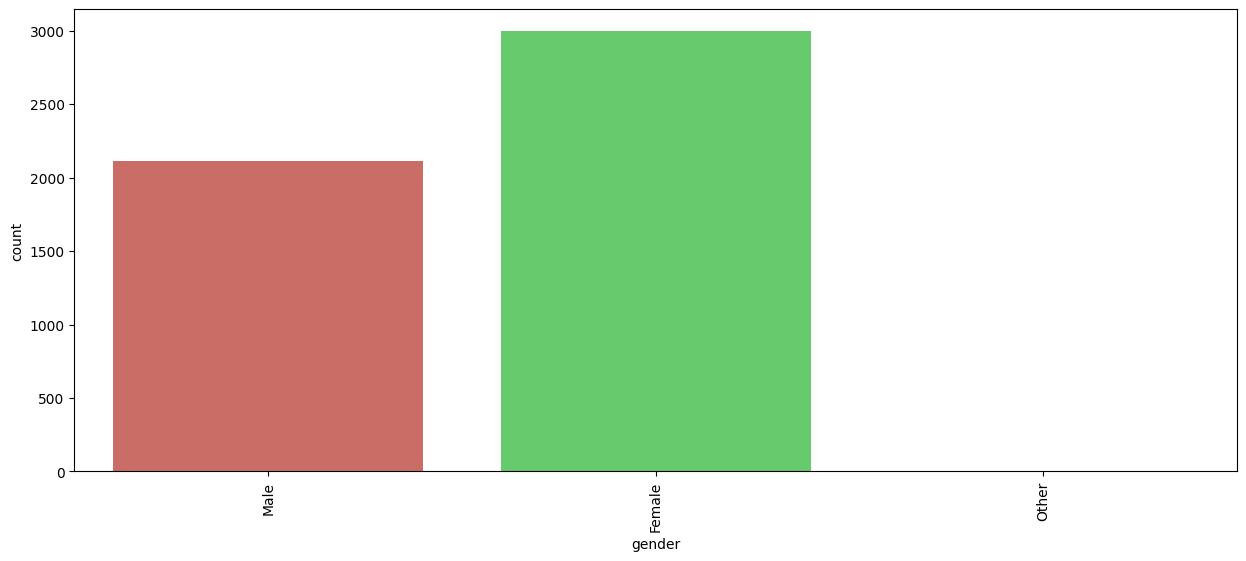

In [26]:
plt.figure(figsize=(15, 6))
sns.countplot(data= df,
              x= 'gender',
              palette= 'hls')
plt.xticks(rotation= 90)
plt.show()

In [27]:
df['age'].value_counts()

age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: count, Length: 104, dtype: int64

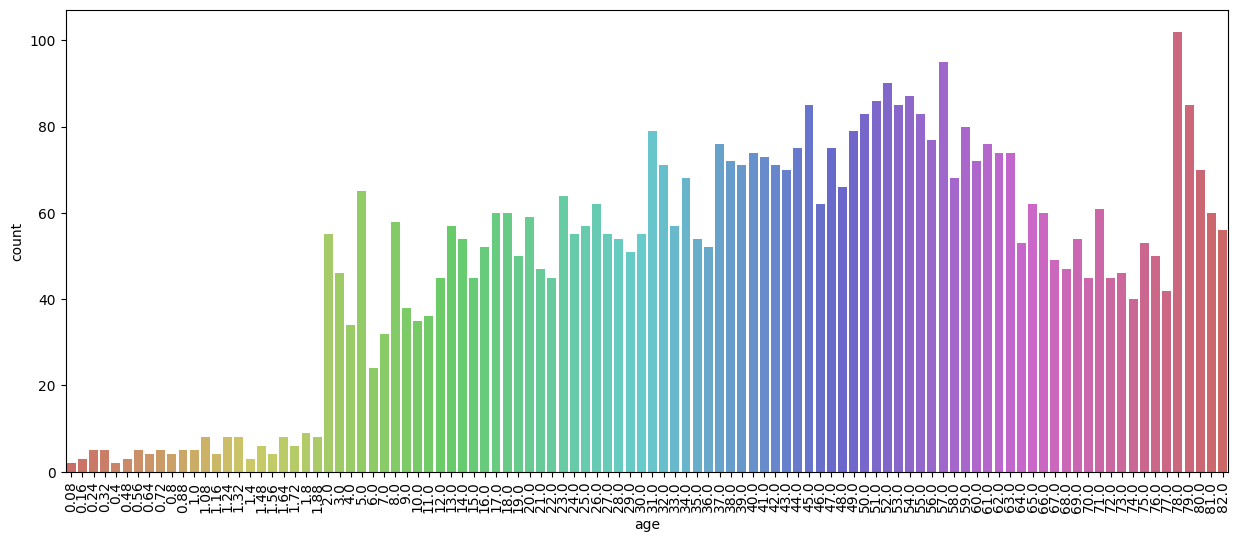

In [28]:
plt.figure(figsize=(15, 6))
sns.countplot(data= df,
              x= 'age',
              palette= 'hls')
plt.xticks(rotation= 90)
plt.show()

Obs. 

Muitos dados para visualizar em gráfico de barra, Utilizar o histograma para verificar a distribuição

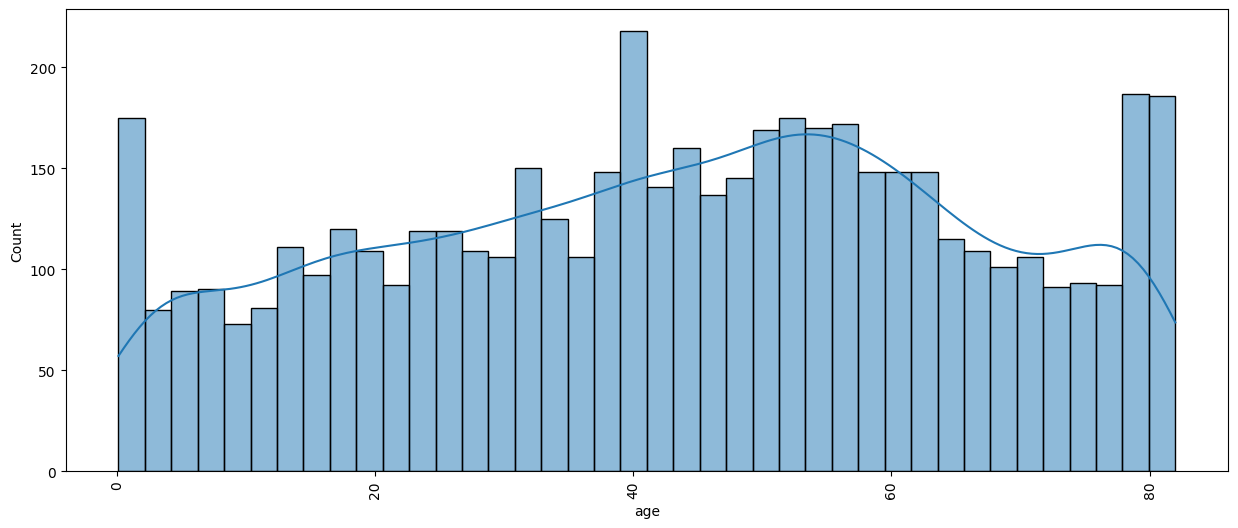

In [29]:
plt.figure(figsize= (15, 6))
sns.histplot(df['age'], bins= 40, kde= True, palette= 'husl')
plt.xticks(rotation= 90)
plt.show()

In [30]:
df['hypertension'].value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

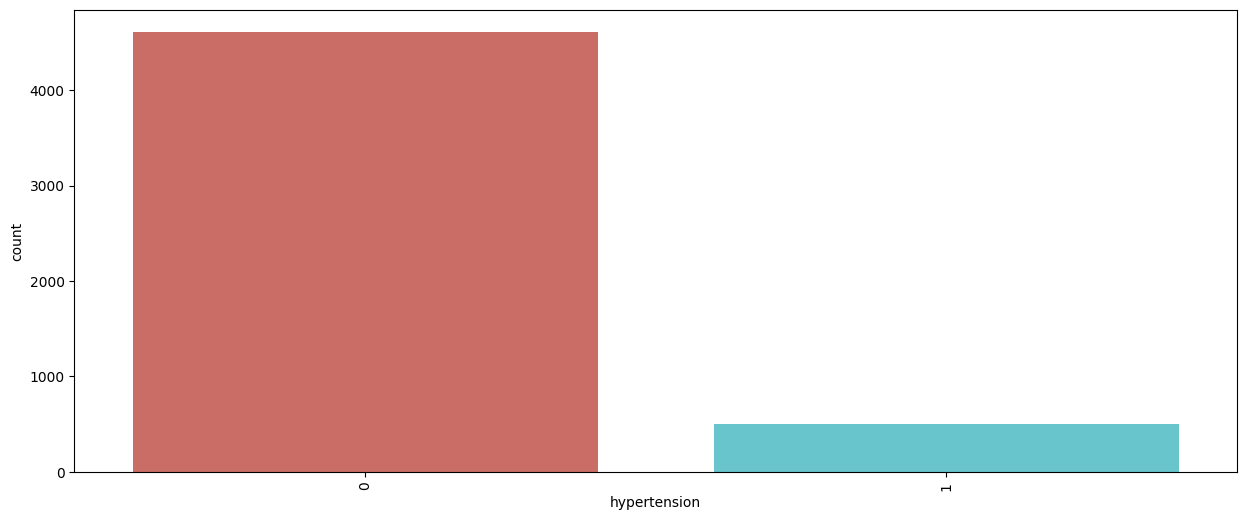

In [31]:
plt.figure(figsize=(15, 6))
sns.countplot(data= df,
              x= 'hypertension',
              palette= 'hls')
plt.xticks(rotation= 90)
plt.show()

In [32]:
df['heart_disease'].value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

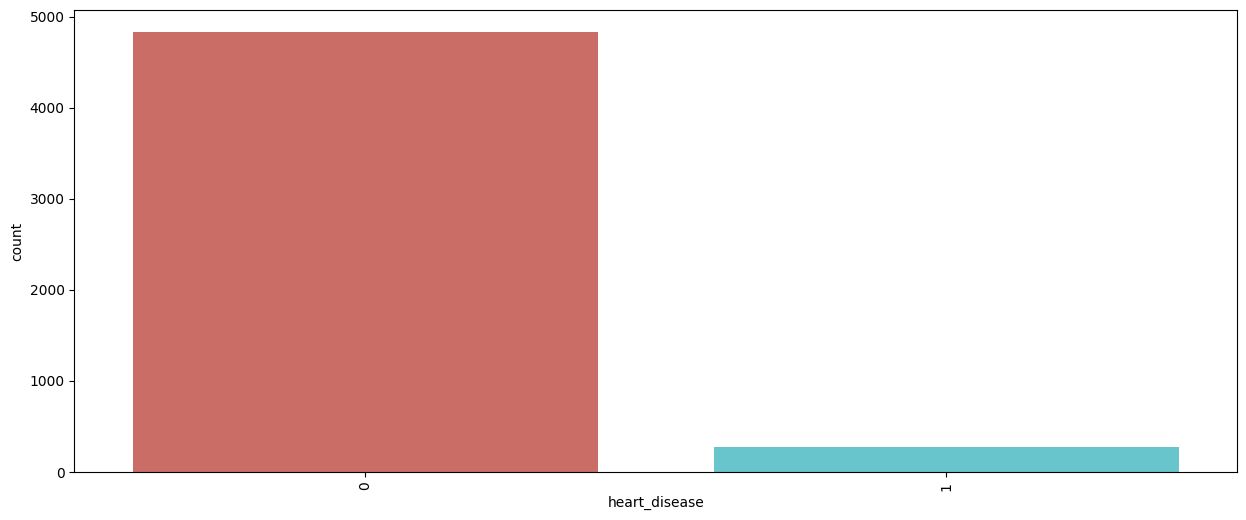

In [33]:
plt.figure(figsize=(15, 6))
sns.countplot(data= df,
              x= 'heart_disease',
              palette= 'hls')
plt.xticks(rotation= 90)
plt.show()

In [34]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

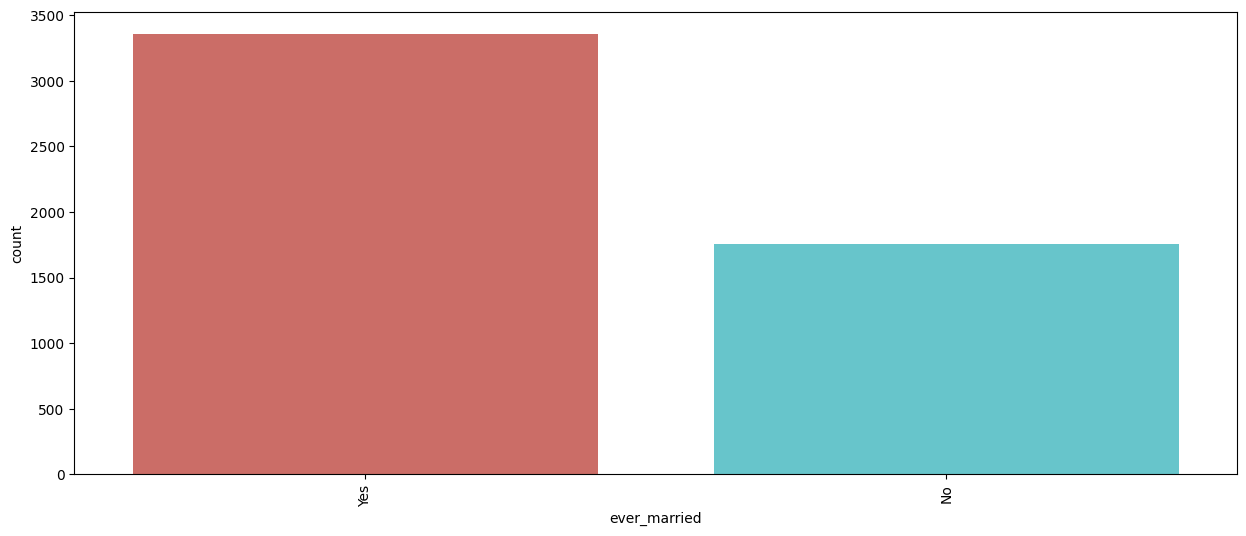

In [35]:
plt.figure(figsize=(15, 6))
sns.countplot(data= df,
              x= 'ever_married',
              palette= 'hls')
plt.xticks(rotation= 90)
plt.show()

In [36]:
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

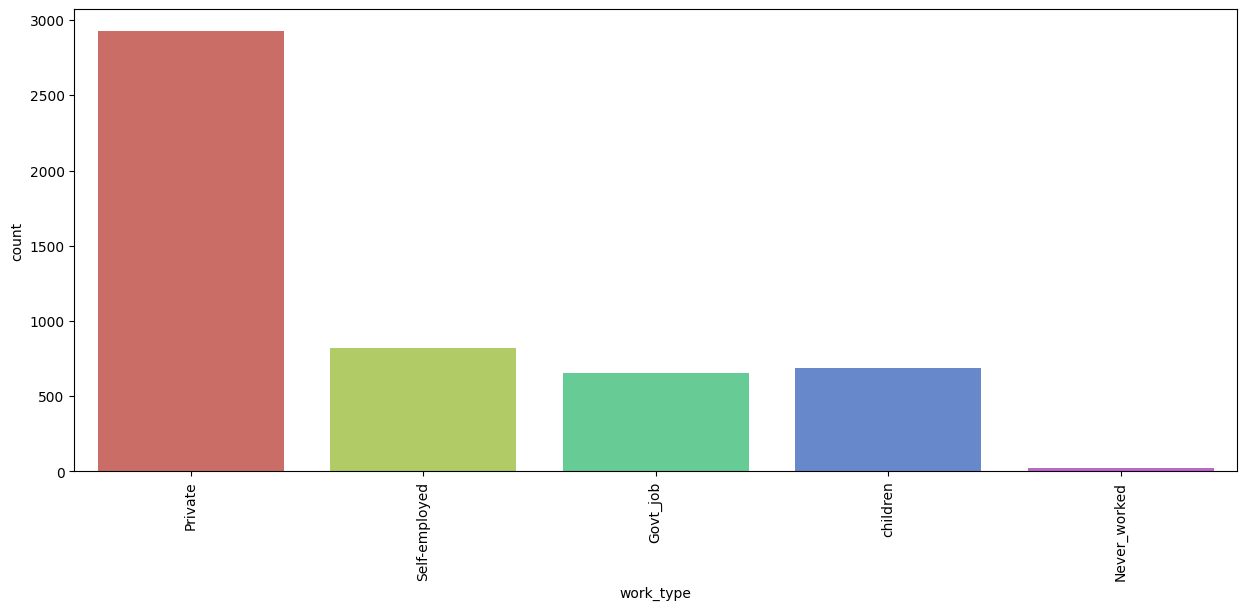

In [37]:
plt.figure(figsize=(15, 6))
sns.countplot(data= df,
              x= 'work_type',
              palette= 'hls')
plt.xticks(rotation= 90)
plt.show()

In [38]:
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

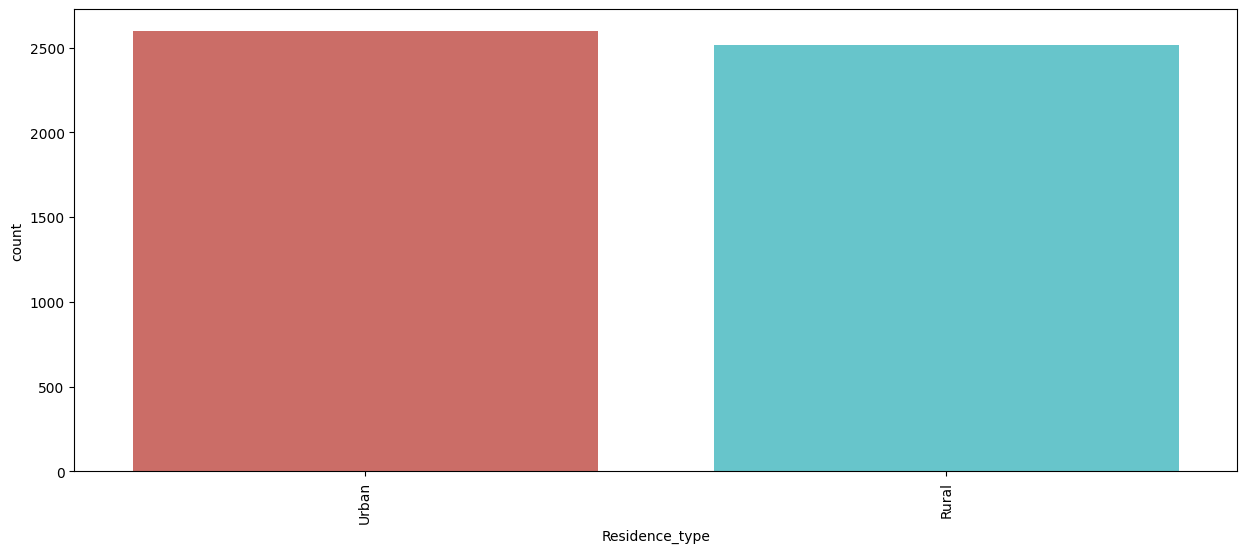

In [39]:
plt.figure(figsize=(15, 6))
sns.countplot(data= df,
              x= 'Residence_type',
              palette= 'hls')
plt.xticks(rotation= 90)
plt.show()

In [40]:
df['avg_glucose_level'].value_counts()

avg_glucose_level
93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: count, Length: 3979, dtype: int64

Obs. 

Muitos dados para visualizar em gráfico de barra, Utilizar o histograma para verificar a distribuição

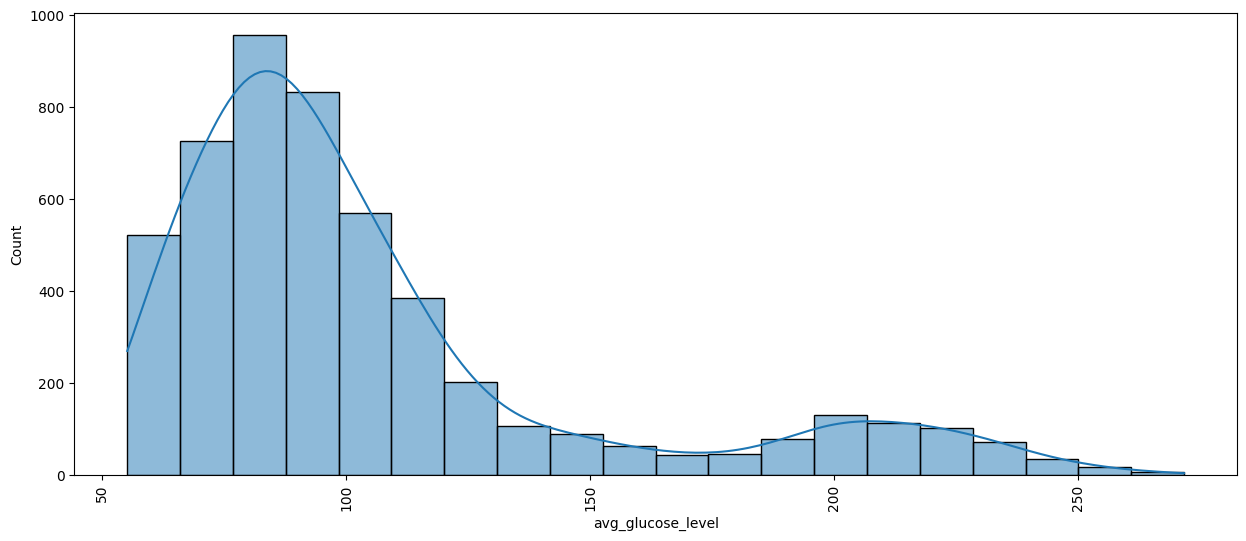

In [41]:
plt.figure(figsize= (15, 6))
sns.histplot(df['avg_glucose_level'], bins= 20, kde= True, palette= 'husl')
plt.xticks(rotation= 90)
plt.show()

In [42]:
df['bmi'].value_counts()

bmi
28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: count, Length: 418, dtype: int64

Obs. 

Muitos dados para visualizar em gráfico de barra, Utilizar o histograma para verificar a distribuição

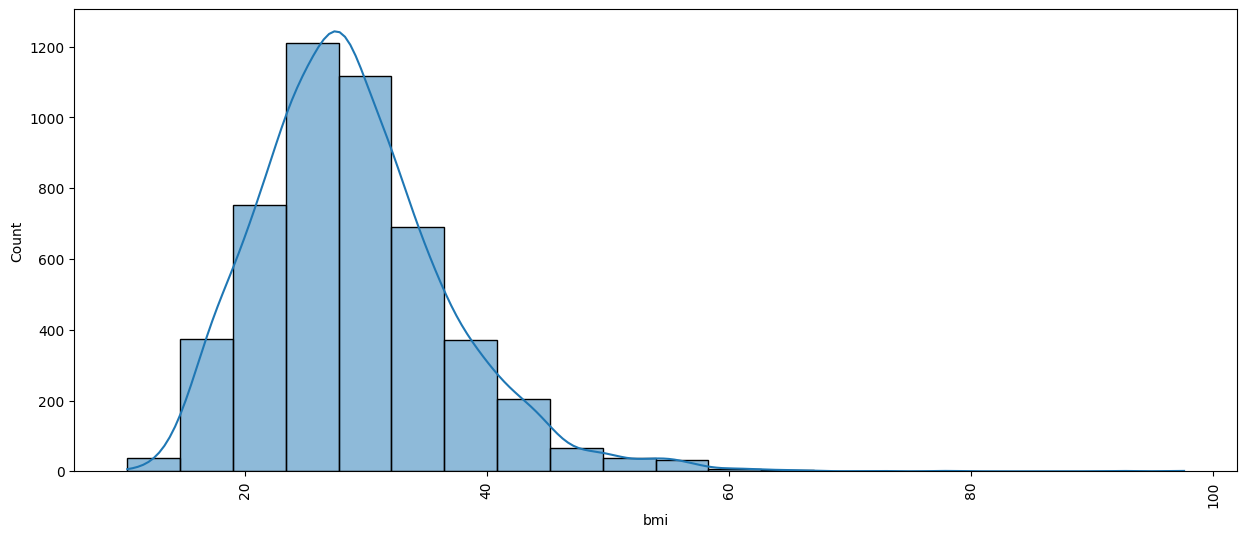

In [43]:
plt.figure(figsize= (15, 6))
sns.histplot(df['bmi'], bins= 20, kde= True, palette= 'husl')
plt.xticks(rotation= 90)
plt.show()

In [44]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

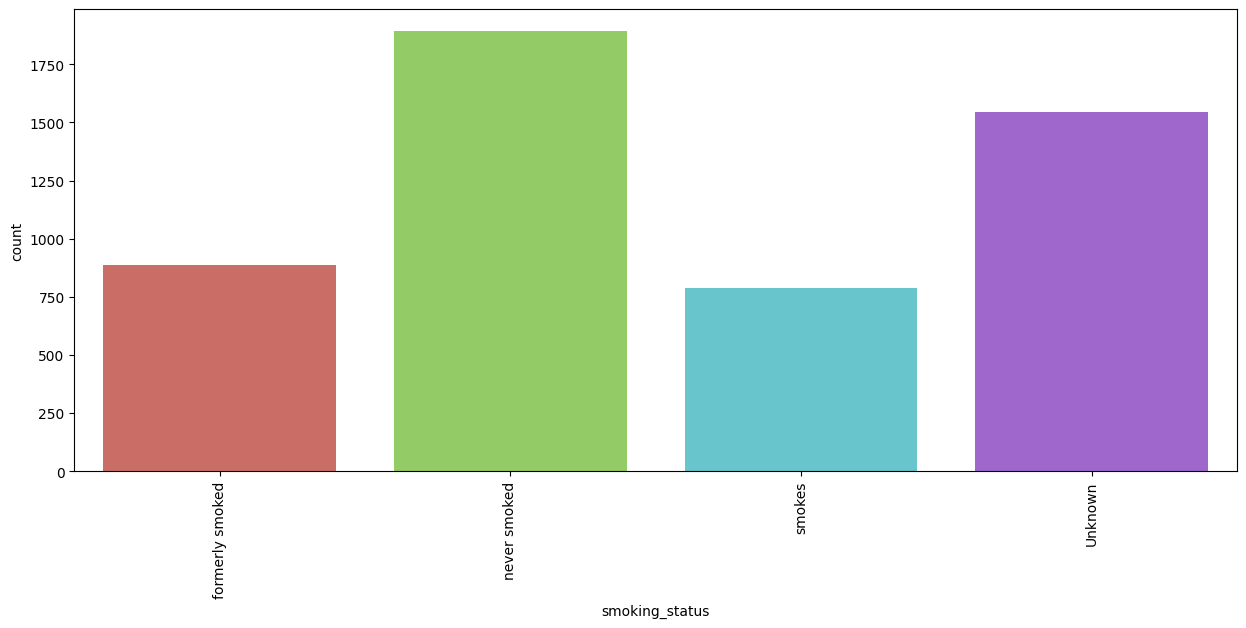

In [45]:
plt.figure(figsize=(15, 6))
sns.countplot(data= df,
              x= 'smoking_status',
              palette= 'hls')
plt.xticks(rotation= 90)
plt.show()

In [46]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

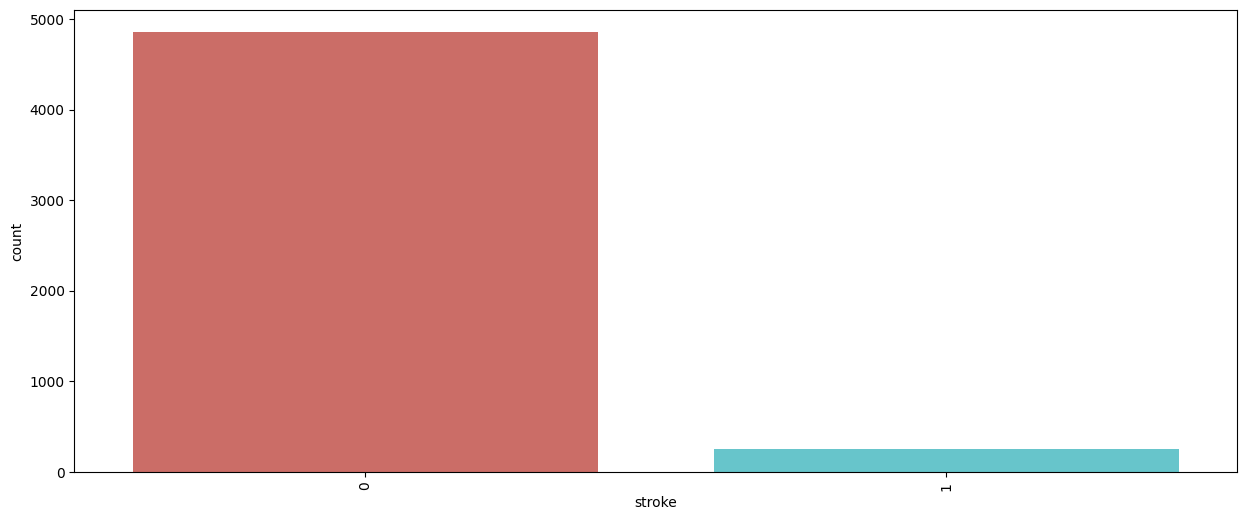

In [47]:
plt.figure(figsize=(15, 6))
sns.countplot(data= df,
              x= 'stroke',
              palette= 'hls')
plt.xticks(rotation= 90)
plt.show()

Seaborn Line Plots descreve a relação entre valores contínuos e categóricos em um formato de ponto de dados contínuo.

É uma visualização de dados relacionais que mostra como uma variável contínua muda quando outra muda.

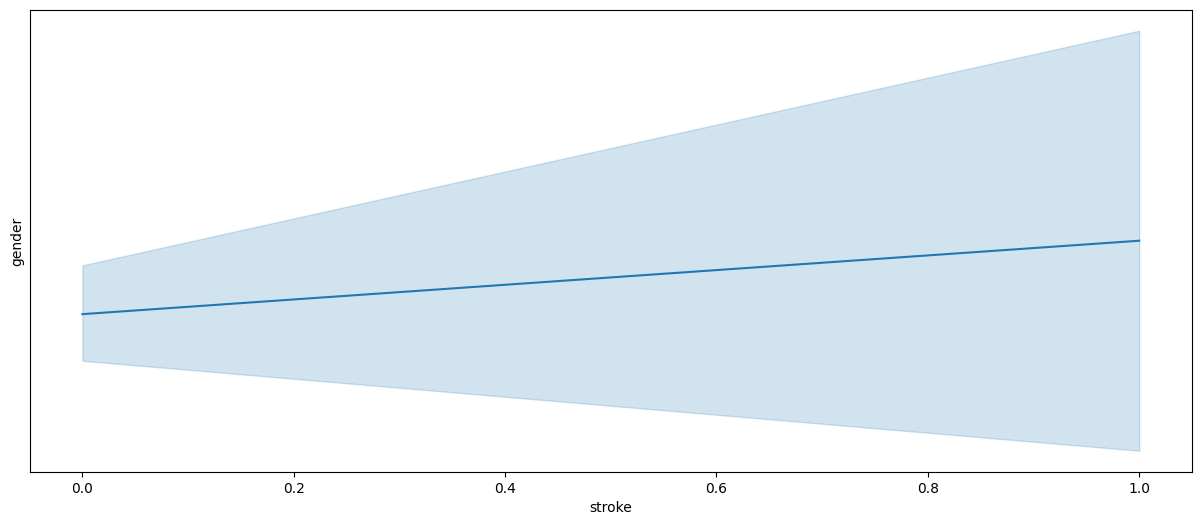

In [48]:
plt.figure(figsize= (15, 6))
sns.lineplot(y= df['gender'], x= df['stroke'], data= df, palette= 'husl')
plt.show()

Obs.

No gráfico acima a variável sexo não parece ter relação forte com AVC

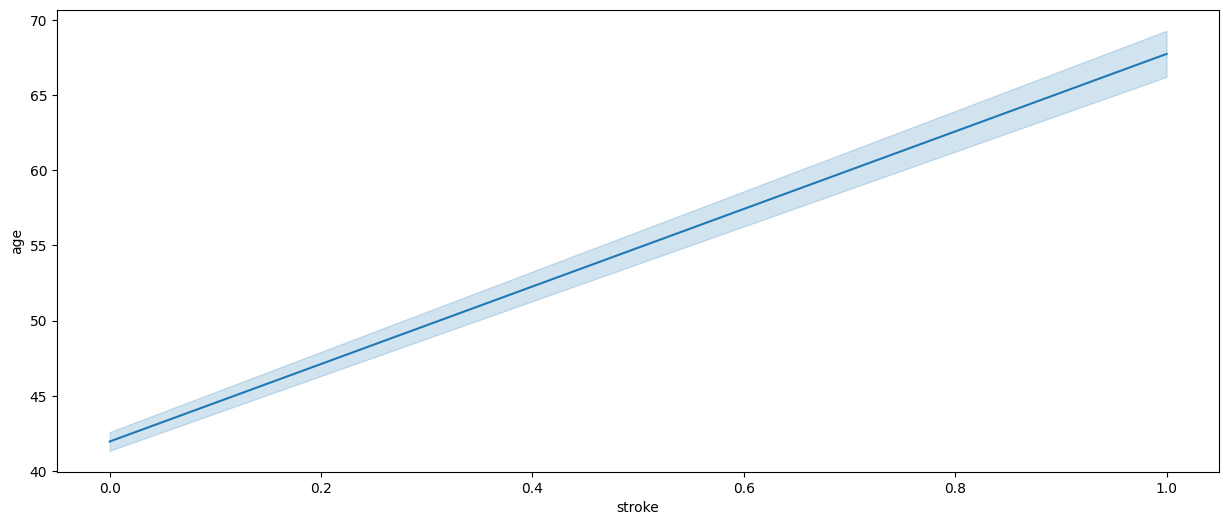

In [49]:
plt.figure(figsize= (15, 6))
sns.lineplot(y= df['age'], x= df['stroke'], data= df, palette= 'husl')
plt.show()

Obs.

No gráfico acima a variável idade tem forte relação com AVC

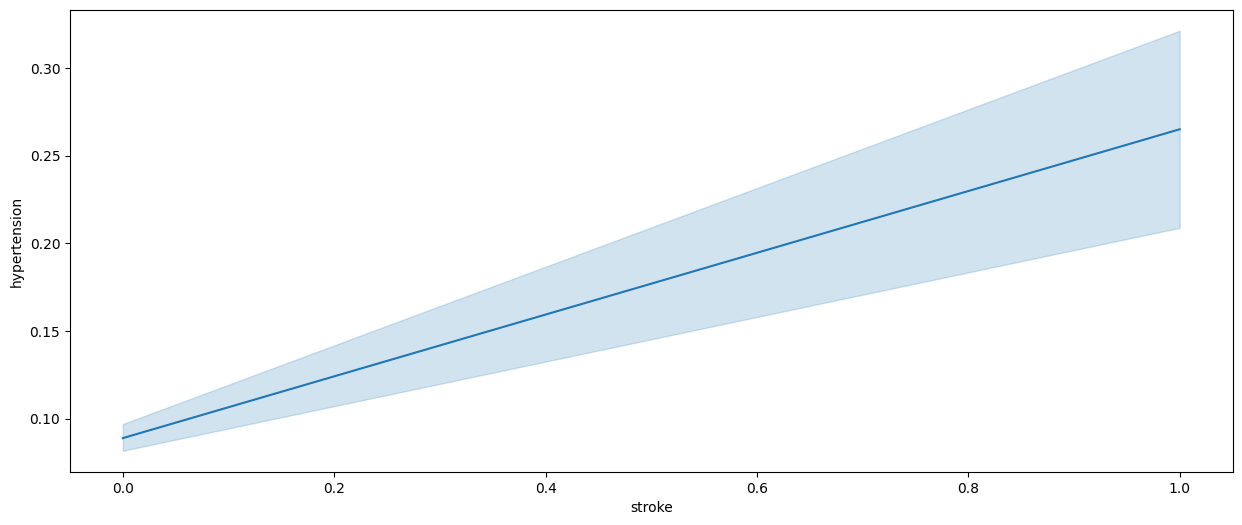

In [50]:
plt.figure(figsize= (15, 6))
sns.lineplot(y= df['hypertension'], x= df['stroke'], data= df, palette= 'husl')
plt.show()

Obs.

No gráfico acima a variável hipertensão tem forte relação com AVC

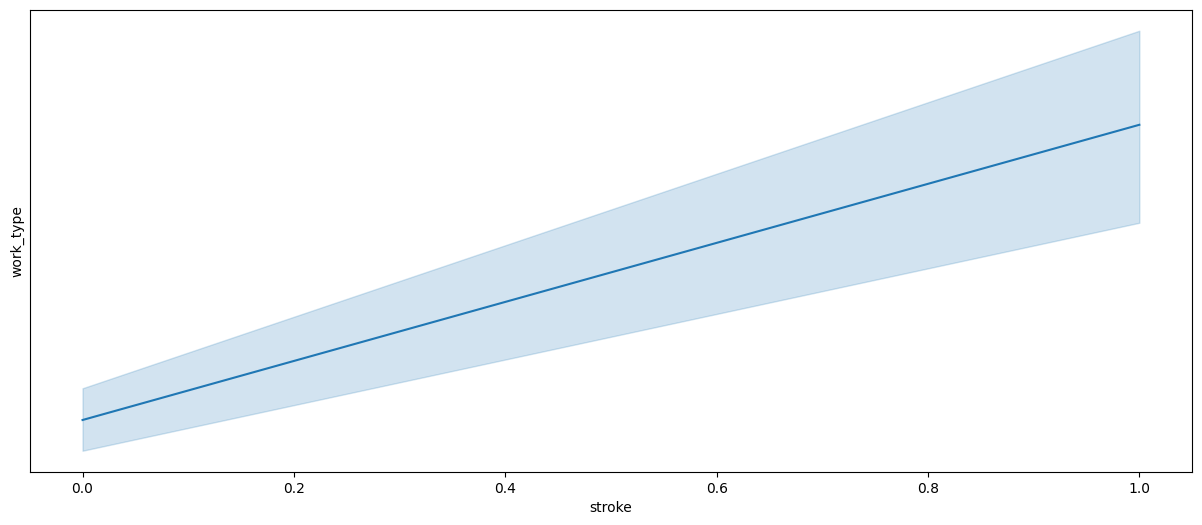

In [51]:
plt.figure(figsize= (15, 6))
sns.lineplot(y= df['work_type'], x= df['stroke'], data= df, palette= 'husl')
plt.show()

Obs.

No gráfico acima a variável tipo de trabalho tem forte relação com AVC

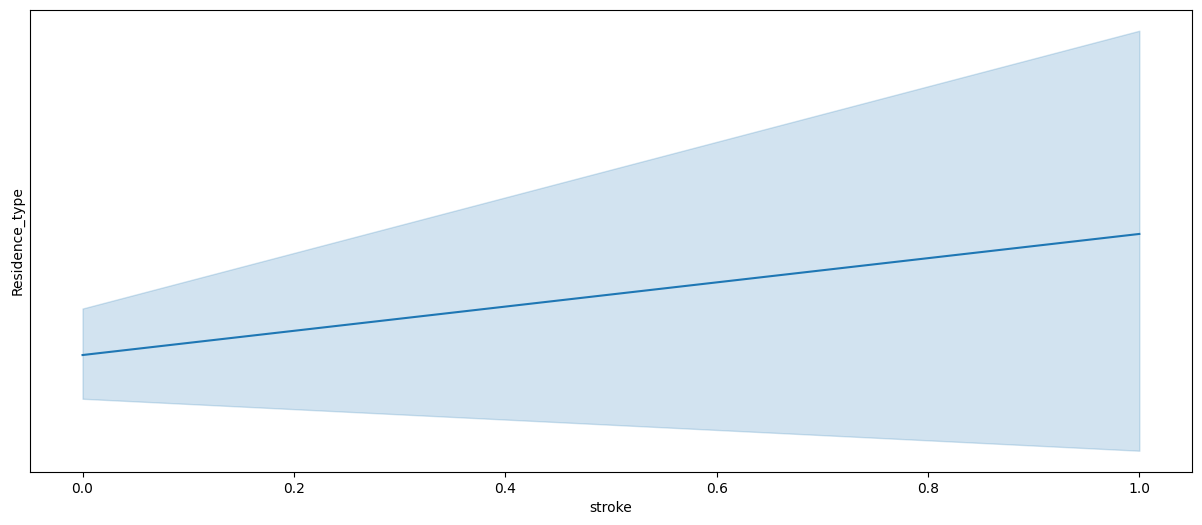

In [52]:
plt.figure(figsize= (15, 6))
sns.lineplot(y= df['Residence_type'], x= df['stroke'], data= df, palette= 'husl')
plt.show()

Obs.

No gráfico acima a variável tipo de residencia não tem forte relação com AVC

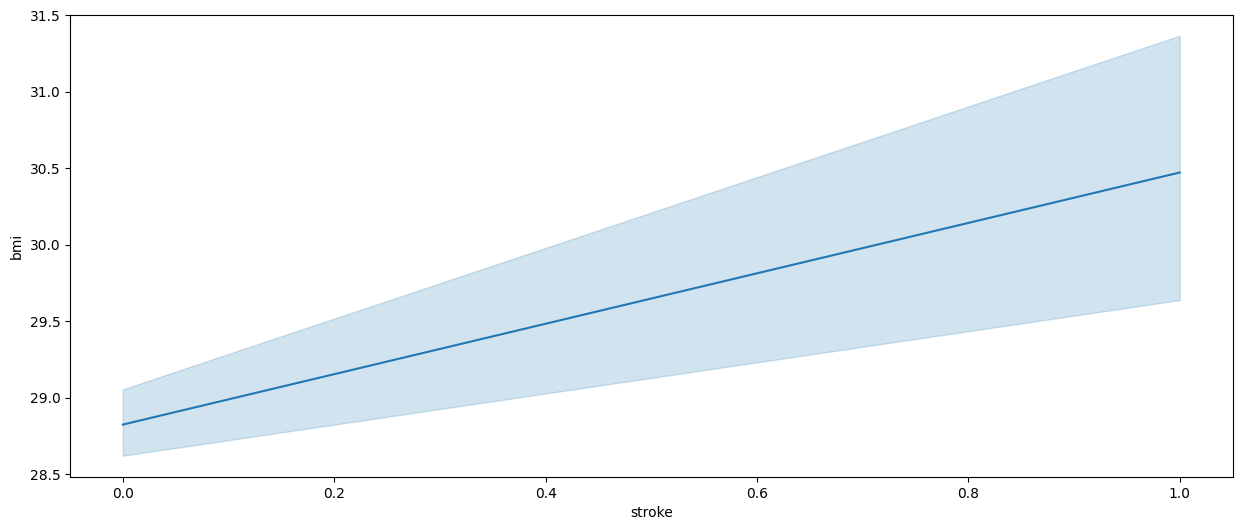

In [57]:
plt.figure(figsize= (15, 6))
sns.lineplot(y= df['bmi'], x= df['stroke'], data= df, palette= 'husl')
plt.show()

Obs.

No gráfico acima a variável índice de massa corporal tem forte relação com AVC

_____________________________________________________________________________________________________

Utilizando Correlação

Quadro de dados. corr ( método = 'pearson' , min_periods = 1 , numeric_only = False )

Calcule a correlação emparelhada de colunas, excluindo valores NA/nulos.

**Parâmetros método {'pearson', 'kendall', 'spearman'} ou callable**

Método de correlação:

* Pearson: coeficiente de correlação padrão

* kendall : Coeficiente de correlação Kendall Tau

* spearman: correlação de classificação de lanceiro

* callable: callable com entrada de dois ndarrays 1d e retornando um float. Observe que a matriz retornada de corr terá 1 ao longo das diagonais e será simétrica independentemente do comportamento do callable.

**min_periods int, opcional**

Número mínimo de observações necessárias por par de colunas para obter um resultado válido. Atualmente disponível apenas para correlação de Pearson e Spearman.

**numeric_only bool, padrão Falso**

Inclua apenas float , int ou dados booleanos .

_____________________________________________________________________________________________________

Explicando os diferentes componentes do código:

plt.figure(figsize=(15,6)) cria uma nova figura do Matplotlib com uma largura de 15 unidades e altura de 6 unidades. Isso define o tamanho da figura do gráfico que será exibido.

matrix = np.triu(df_corr) cria uma matriz triangular superior a partir da matriz de correlação df_corr. A função np.triu do NumPy retorna uma matriz com todos os elementos abaixo da diagonal principal (inclusive) definidos como zero, preservando apenas os elementos da diagonal principal e acima dela.

sns.heatmap(df_corr, annot=True, linewidth=.8, mask=matrix, cmap='crest') cria o mapa de calor. Ele usa a função heatmap do Seaborn para exibir as correlações entre as colunas do DataFrame df_corr. O parâmetro df_corr especifica a matriz de correlação a ser utilizada. O parâmetro annot=True adiciona os valores das correlações nos quadrados do mapa de calor. O parâmetro linewidth=.8 define a largura das linhas que separam os quadrados do mapa de calor. O parâmetro mask=matrix oculta os quadrados abaixo da diagonal principal, conforme definido na matriz triangular superior criada anteriormente. O parâmetro cmap='crest' define a paleta de cores a ser utilizada no mapa de calor.

plt.show() exibe o mapa de calor na saída.

In [62]:
# df_corr = 

ValueError: could not convert string to float: 'Male'

In [ ]:
df.columns